## Image Classifiers using Convolutional Neural Networks

### Chet Huang, 22 Dec 2019

This notebook trains various machine learning models to classify objects in the Keras CIFAR-10 images dataset. The dataset consists of 60,000 32x32 pixel color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.

Google Tensorflow and Keras are used to build convolutional neural networks.  This notebook imports the Keras dataset so an internet connection is needed to run the code.  Exploratory image analysis and data preparation steps are explained.  Several models are build, with each model progressively using hyperparameters that improve image classification accuracy.

In the interest of keeping training times short and demonstrating capability rather than best accuracy, each model is train with just 5 epochs.  The initial model achieves an overall image classification accuracy of ~40% while the final model is a deep convolutional neural network and an overall classification accuracy of ~75%.

In [1]:
# import TensorFlow and keras for convolutional neural network modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import layers

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# for reviewing model performance
from sklearn.metrics import classification_report

## Import, explore, and prepare data
Load the image library into training and testing sets from Keras

In [2]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

Each image in the dataset is 32x32 pixels, with each pixel having 3 scalar values for its color representation in RGB channels.  Let's plot a sample image

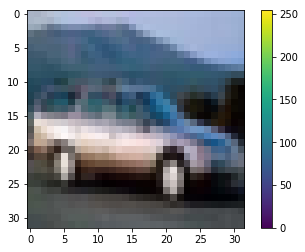

In [3]:
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.show()

From the plot above and the data source notes, we see that color channel values range from 0~255.  This range does not have inherent meaning to a learning model.  Let's simplify the data by rescaling these channel values from 0~1, then replot to verify the scale change.

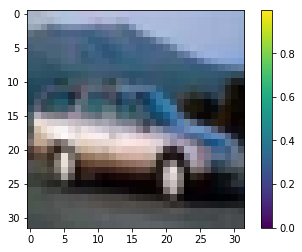

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.show()

Let's also look at grid of samples along with their respective labels.  We know from publisher of dataset that the labels are:
0: airplane, 1: automobile, 2: bird, 3: cat, 4: deer, 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

C:\Users\chet\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


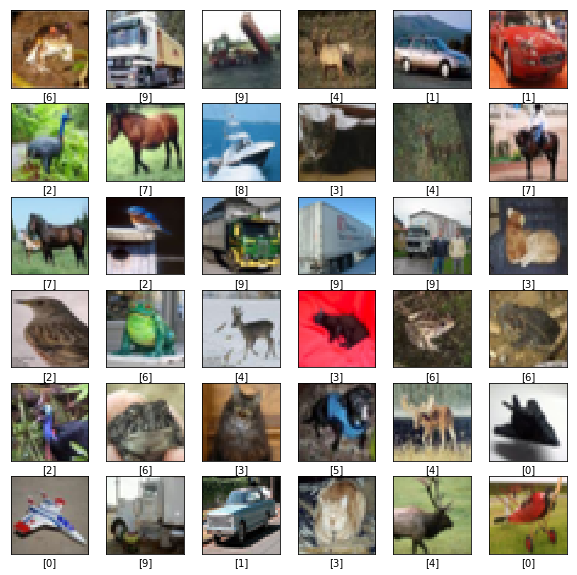

In [5]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

Before we feed the image data into a model we will also recognize that the 32x32 array of pixel values will be flattened into essentially the pixel number and channel values.  Let's make some sample plots to illustrate this flattening procedure.

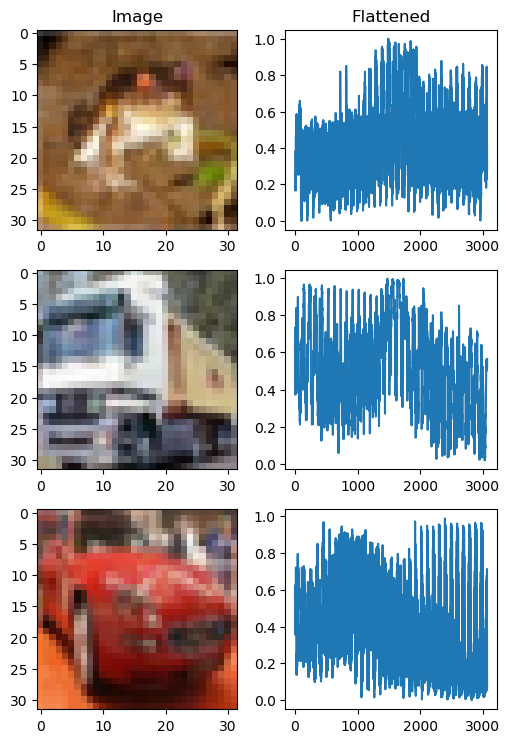

In [6]:
plt.figure(1, figsize=(6,9), dpi=100)

plt.subplot(3,2,1)
plt.imshow(x_train[0])
plt.title('Image')
plt.subplot(3,2,2)
plt.plot(x_train[0].reshape(32*32*3,))
plt.title('Flattened')

plt.subplot(3,2,3)
plt.imshow(x_train[1])
plt.subplot(3,2,4)
plt.plot(x_train[1].reshape(32*32*3,))

plt.subplot(3,2,5)
plt.imshow(x_train[5])
plt.subplot(3,2,6)
plt.plot(x_train[5].reshape(32*32*3,))

## Build and test models
We will use Google TensorFlow and Keras to build our image classification models.  We start with baby step and build a shallow neural network model.

In [7]:
# set random seed for reproducibility within context of assignment
tf.compat.v1.random.set_random_seed(42)

# initialize model
imclf = tf.keras.Sequential()

# Let's try a shallow network. The first layer flattens the input.  Next layer with have 100 nodes using relu activation.
imclf.add(layers.Flatten())
imclf.add(layers.Dense(100, activation='relu'))

# There are 10 output categories, so we need ten output nodes
imclf.add(layers.Dense(10, activation='softmax'))

# We'll use the Adam optimizing with default learning rate of 0.001.
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model.  The metrics parameter is for reporting
imclf.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Fit and predict.  Fit sends back training history data
history = imclf.fit(x_train, y_train, epochs=5, batch_size=20, verbose=1)
Yptest = imclf.predict(x_test).ravel()

# After training, output test results
result = imclf.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss, accuracy:', result)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 181us/sample - loss: 1.9162 - sparse_categorical_accuracy: 0.3061
Epoch 2/5
50000/50000 [==============================] - 8s 170us/sample - loss: 1.7842 - sparse_categorical_accuracy: 0.3600
Epoch 3/5
50000/50000 [==============================] - 9s 171us/sample - loss: 1.7348 - sparse_categorical_accuracy: 0.3791
Epoch 4/5
50000/50000 [==============================] - 10s 191us/sample - loss: 1.7032 - sparse_categorical_accuracy: 0.3908
Epoch 5/5
50000/50000 [==============================] - 9s 173us/sample - loss: 1.6859 - sparse_categorical_accuracy: 0.3981


Test loss, accuracy: [1.7125303157806397, 0.3859]


Our initial model with shallow network achieves accuracy ~40%.  While better than random guess, we can do better.  Let's try adding 3 dense layers.  We also use batch normalization so that inputs to each node is normalized.  This has the effect of helping ensure certain batches don't adversely affect model performance.  We will also use dropout function and set that to 10% to reduce the chance of overfitting.

In [8]:
tf.compat.v1.random.set_random_seed(42)

imclf = tf.keras.Sequential()

imclf.add(layers.Flatten())  # First layer flattens data

# Iterate and add 3 identical dense layers
for _ in range(3):
    imclf.add(layers.Dense(100, activation='relu'))
    imclf.add(layers.BatchNormalization())
    imclf.add(layers.Dropout(0.1))

# There are 10 output categories, so we need ten output nodes
imclf.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model. The metrics parameter is for reporting
imclf.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Fit and predict. Fit sends back training history data
history = imclf.fit(x_train, y_train, epochs=5, batch_size=20, verbose=1)
Yptest = imclf.predict(x_test).ravel()

# After training, output test results
result = imclf.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss, accuracy:', result)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 236us/sample - loss: 1.9145 - sparse_categorical_accuracy: 0.3162
Epoch 2/5
50000/50000 [==============================] - 10s 209us/sample - loss: 1.7664 - sparse_categorical_accuracy: 0.3660
Epoch 3/5
50000/50000 [==============================] - 10s 210us/sample - loss: 1.7039 - sparse_categorical_accuracy: 0.3889
Epoch 4/5
50000/50000 [==============================] - 11s 217us/sample - loss: 1.6705 - sparse_categorical_accuracy: 0.4028
Epoch 5/5
50000/50000 [==============================] - 11s 214us/sample - loss: 1.6516 - sparse_categorical_accuracy: 0.4092


Test loss, accuracy: [1.639986629295349, 0.4141]


Test loss/accuracy are also slightly better than train, suggesting that dropout helped curb overtraining.  The two additional hidden layers didn't seem to improve results by much though.  We've added more nodes but we haven't taken advantage of additional parameters, especially ones that can help with image classification.

For our third and final mode, let's use convolutional neural network.  We use padding at the edges to allow for subjects to be off-center.

In [9]:
tf.compat.v1.random.set_random_seed(42)

imclf = tf.keras.Sequential()
inputShape = (32, 32, 3)
chanDim = -1 # this means the channels dimension is the last in the array

imclf.add(layers.Conv2D(32, (3, 3), padding="valid", input_shape=inputShape, activation="relu"))
imclf.add(layers.BatchNormalization(axis=chanDim))
imclf.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu'))
imclf.add(layers.BatchNormalization(axis=chanDim))
imclf.add(layers.Dropout(0.2))

# stack two more CONV layers, keeping the size of each filter
# as 3x3 but increasing to 64 total learned filters
imclf.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
imclf.add(layers.BatchNormalization(axis=chanDim))
imclf.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same", activation="relu"))
imclf.add(layers.BatchNormalization(axis=chanDim))
imclf.add(layers.Dropout(0.25))

# increase the number of filters again, this time to 128
imclf.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))        
imclf.add(layers.BatchNormalization(axis=chanDim))
imclf.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same", activation='relu'))
imclf.add(layers.BatchNormalization(axis=chanDim))
imclf.add(layers.Dropout(0.35))
imclf.add(layers.Flatten())

# softmax classifier
imclf.add(layers.Dense(10, activation='softmax'))
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# compile our TensorFLow model
imclf.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
      
# Fit and predict. Fit sends back training history data
history = imclf.fit(x_train, y_train, epochs=5, batch_size=20, verbose=1)
Yptest = imclf.predict(x_test).ravel()

# After training, output test results
result = imclf.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss, accuracy:', result)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 228s 5ms/sample - loss: 1.6409 - sparse_categorical_accuracy: 0.45399s - los -
Epoch 2/5
50000/50000 [==============================] - 227s 5ms/sample - loss: 1.0811 - sparse_categorical_accuracy: 0.6225
Epoch 3/5
50000/50000 [==============================] - 227s 5ms/sample - loss: 0.8845 - sparse_categorical_accuracy: 0.6899
Epoch 4/5
50000/50000 [==============================] - 228s 5ms/sample - loss: 0.7754 - sparse_categorical_accuracy: 0.7279
Epoch 5/5
50000/50000 [==============================] - 228s 5ms/sample - loss: 0.6911 - sparse_categorical_accuracy: 0.7580


Test loss, accuracy: [0.666911911392212, 0.7686]


Our convoluted neural network model achieved ~75% accuracy, quite an improvement from where we started at 40%.  Let's look at the classification report and see where the model has more trouble.

In [10]:
predictions = imclf.predict(x_test)
y_pred = []
for i in range (10000):
    y_pred.append(np.argmax(predictions[i]))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.88      0.91      0.89      1000
           2       0.75      0.56      0.64      1000
           3       0.53      0.71      0.61      1000
           4       0.72      0.72      0.72      1000
           5       0.69      0.66      0.67      1000
           6       0.82      0.83      0.83      1000
           7       0.82      0.81      0.82      1000
           8       0.91      0.84      0.87      1000
           9       0.84      0.87      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



Our model has difficulty classifying 2, 3, 4, 5 which are bird, cat, deer, dog respectively.  Intuitively, it is not surprising that cats, deer, dogs are difficult to classify.  They are all four legged animals with similar characteristics.  Let's also plot a 10x10 grid of sample predicted vs actal classes.

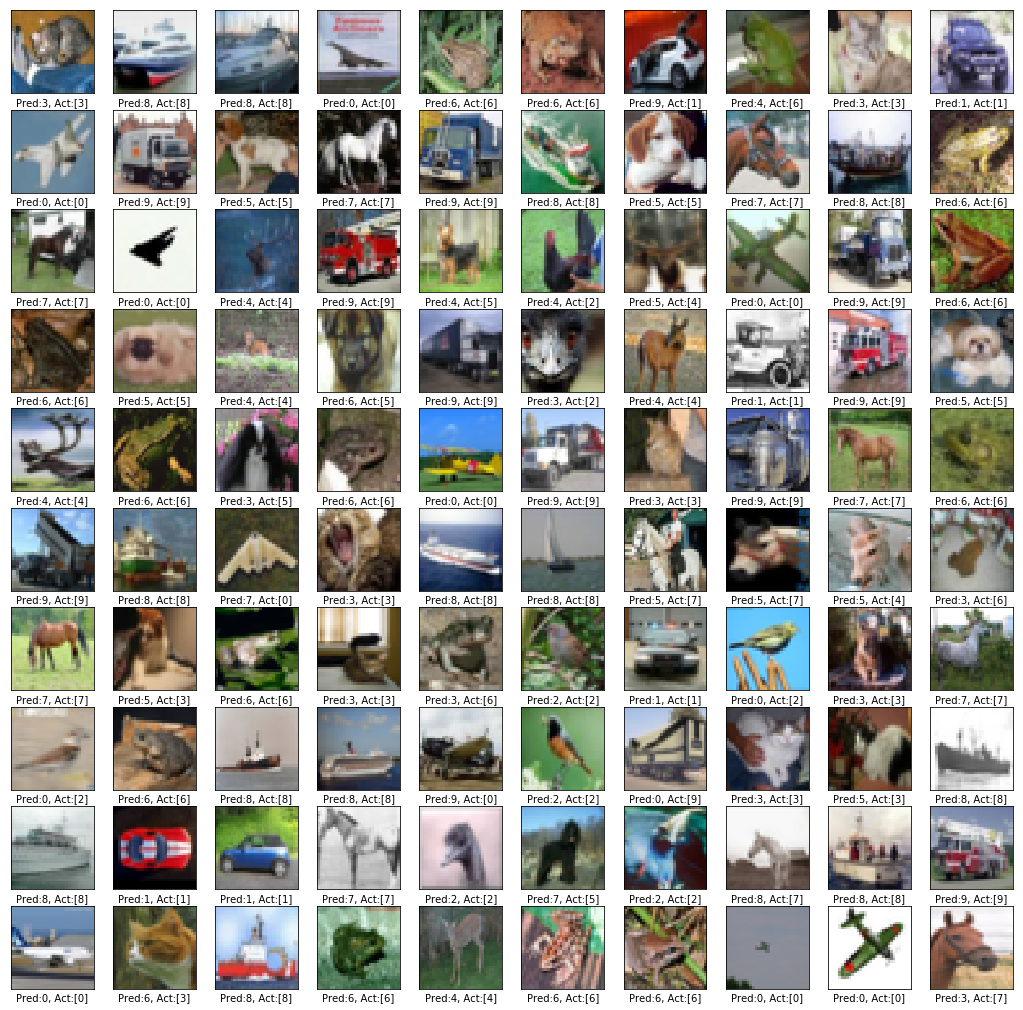

In [11]:
plt.figure(figsize=(18,18))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Pred:{}, Act:{}".format(y_pred[i], y_test[i]))
plt.show()

## Summary
In this notebook we built various neural network models to classify 10 category of images.  We learned about how image data is really just a stream of pixel values.  The image data is flattened and fed into, initially, a shallow neural network.  We found that ~40% classification accuracy can be achieved relatively easily.  We then added more hidden network layers to give the network more opportunity to learn the image classifications but adding more layers alone did not improve model accuracy.  Our final model used batch normalization to reduce the effects of batching to skew the model.  We also used padding to allow subtjects in images to be off-center.  This final deep CNN model achieved ~75% classification accuracy with just 5 training epochs.